# Mathematics in AI MS0240
## Assignmnet 1 
### Question 1 

#### Name: Choo Weng Yan 
#### Class: DIT/FT/2A/14


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
data = pd.read_csv('cars.csv')
data.head()

,Vehicle Name,Type,Drive,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
0,Acura 3.5 RL,Sedan,Front-wheel,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL Navigation,Sedan,Front-wheel,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,SUV,All-wheel,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX S,Sports,Rear-wheel,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX,Sedan,Front-wheel,23820,21761,2.0,4,200,24,31,2778,101,172,68


#### (a) Should PCA be carried out on covariance or correlation matrix?  Explain. 

PCA should be carried out on correlation matrix. This is because the variables have different maginitude/scales and different unit of measurement for each variables.

#### (b) Extract the principal components.  Justify your decision and interpret the principal components.  You should include the necessary tables, outputs and graphs. 

In [3]:
data_reduced = data.drop(['Vehicle Name','Type','Drive'], axis=1)
data_reduced.head()

,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [4]:
#scaling the data before PCA 
#standardized the variables -> Z values 
from sklearn.preprocessing import scale 
data_reduced=pd.DataFrame(scale(data_reduced),columns=['Retail','Dealer','Engine','Cylinders','Horsepower','CityMPG','HighwayMPG','Weight','Wheelbase','Length','Width'])
data_reduced.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
0,0.534227,0.479546,0.367827,0.163207,0.150424,-0.440043,-0.579806,0.492905,1.100421,0.910587,0.215077
1,0.653268,0.596226,0.367827,0.163207,0.150424,-0.440043,-0.579806,0.511342,1.100421,0.910587,0.215077
2,0.188527,0.162006,0.367827,0.163207,0.720452,-0.630319,-0.757467,1.302729,-0.171233,0.305483,1.701415
3,2.869863,2.770849,0.071678,0.163207,1.076720,-0.630319,-0.579806,-0.538168,-1.019003,-0.829085,-0.082190
4,-0.477746,-0.485493,-1.112919,-1.180648,-0.205843,0.701611,0.663816,-1.070014,-0.877708,-0.980361,-0.973993


In [5]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

#generate the maximum number of PCs = 11 variables in the data
# fit in the standardized data
pca = PCA(n_components=11).fit(data_reduced)

#Note that pca.transform() returns PCA scores based on centred data (fits in the standardized data)
pca_samples = pca.transform(data_reduced)

In [6]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing 
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions
    
    #PCA cumulative variance explained 
    cum_ratios=pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_),1)
    cum_variance_ratios=pd.DataFrame(np.round(cum_ratios,4),columns=['Cumulative Explained Variance'])
    cum_variance_ratios.index=dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios,cum_variance_ratios, components], axis = 1)

In [7]:
pca_results = pca_results(data_reduced, pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
PC 1,7.1230,0.6459,0.6459,-0.2638,-0.2623,-0.3471,-0.3342,-0.3186,0.3105,0.3066,-0.3363,-0.2662,-0.2568,-0.2961
PC 2,1.8888,0.1713,0.8171,0.4685,0.4701,-0.0153,0.0780,0.2922,-0.0034,-0.0110,-0.1675,-0.4182,-0.4084,-0.3129
PC 3,0.8519,0.0772,0.8944,0.2550,0.2573,0.0472,0.0814,0.0764,0.5351,0.5990,-0.1122,0.2645,0.3447,0.0876
PC 4,0.3579,0.0325,0.9268,0.2799,0.2877,-0.5254,-0.6398,-0.0583,-0.1863,-0.1257,0.1195,0.2207,0.1685,0.0907
PC 5,0.2761,0.0250,0.9519,0.0497,0.0368,0.0520,-0.1257,-0.1199,0.3257,0.0397,0.3972,-0.2249,-0.4563,0.6626
PC 6,0.1985,0.0180,0.9699,0.0325,0.0486,0.0054,0.0929,-0.2081,0.2482,-0.0817,0.5416,0.4500,-0.3141,-0.5310
PC 7,0.1409,0.0128,0.9827,-0.2224,-0.2194,-0.0517,-0.2400,0.8135,0.0925,0.0569,-0.0377,0.2995,-0.2775,0.0189
PC 8,0.0869,0.0079,0.9905,-0.0517,-0.0669,0.3585,-0.4233,0.1803,0.1662,-0.0045,0.4170,-0.4584,0.4064,-0.2754
PC 9,0.0666,0.0060,0.9966,0.0907,0.0867,0.6833,-0.4528,-0.2275,-0.1198,0.0101,-0.3360,0.2844,-0.2287,0.0064
PC 10,0.0371,0.0034,0.9999,0.0242,0.0283,-0.0110,-0.0041,0.0106,0.6036,-0.7209,-0.3044,0.0414,0.1369,0.0359


<Figure size 432x288 with 0 Axes>

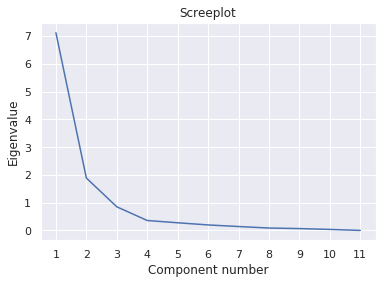

In [8]:
#Scree plot

#ticker is for X-axis
import matplotlib.ticker as ticker
plt.clf()

#generate blank figure (contains figure and axes)
fig1, ax1 = plt.subplots()

ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

Number of PCs to extract:

- By Kaiser's Rule, extract the first 2 PCs whose eigenvalue is 7.1230 and 1.8888 which are greater than 1.
- First 2 PCs already accounted for 81.71% of total variance.
- Screeplot shows elbow at PC4; Suggesting 3 PCs to be extracted.

Hence, first 2 PCs (PC1 and PC2) are extracted.

In [9]:
#Extract only the two PCs for loading plot 

pca2 = PCA(n_components=2).fit(data_reduced)

#take pca2 object, transfrom -> genereate scores based on centered data
scores2 = pca2.transform(data_reduced)

In [10]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function.
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.05

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

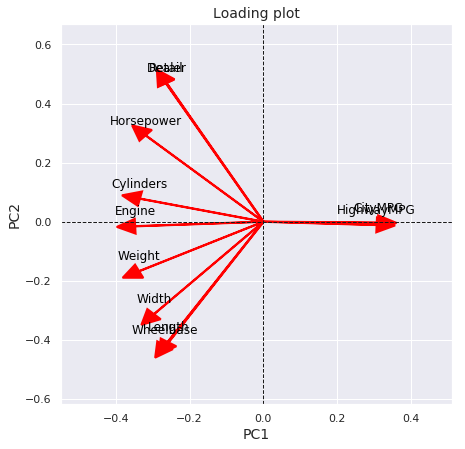

In [11]:
plt.clf
ax2 = loadingplot(data_reduced, pca2, width=7, height=7, margin=0.2)
plt.show()

#### (c) Which type(s) of vehicles has/have the following attributes?  Explain your answer with the aid of a suitable graph with colour or marker to display ‘Type’ information.
- (i) Big size, not so expensive, but not so much horsepower. 
- (ii) Small size, expensive, but a lot of horsepower. 

In [12]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_reduced, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2'])
scores2_notcentred.head()

 

,PC1,PC2
0,-1.567443,-0.447272
1,-1.635648,-0.339732
2,-1.906619,-0.411139
3,-1.590199,3.862579
4,2.654764,0.654451


In [13]:
# Plots score plot with data labels
# Pass original data (original uncentred data), un-centred scores and returns of PCA to this function
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=5, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    #scores -> uncentred scores 
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores,  hue=data['Type'])
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

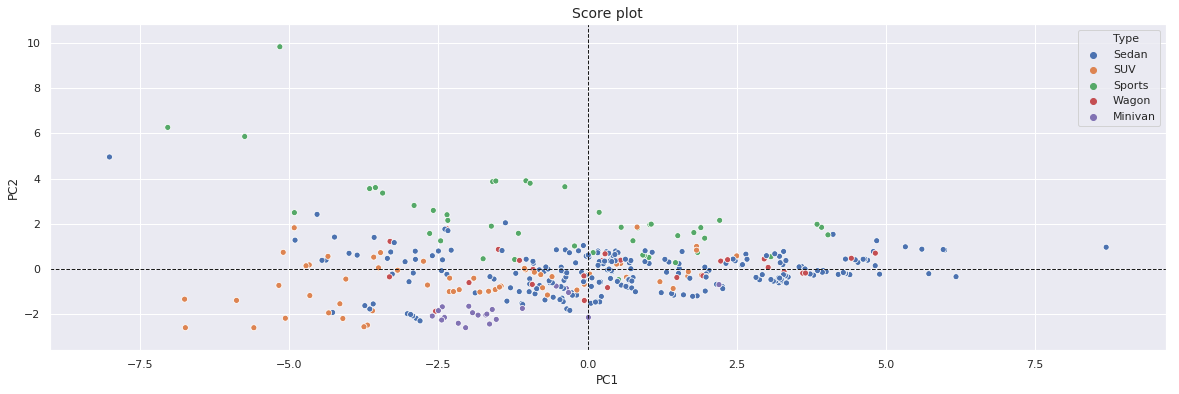

In [14]:
#Score plot 
plt.clf
ax3=scoreplot_label(data,scores2_notcentred,pca2, width=20, height=6, margin=1 )
plt.show()

#### (d) A vehicle has the attributes listed below. What type of vehicle is it likely to be? Show your working and explain.

In [21]:
mean=np.mean(data)
std=np.std(data)

# z scores 
d=[46300,41200,5.7,8,312,12,15,5826,127,209,79]
z=(d-mean)/std
z

Retail        0.663421
Dealer        0.601819
Engine        2.539588
Cylinders     1.507063
Horsepower    1.390235
CityMPG      -1.581698
HighwayMPG   -2.178749
Weight        3.252833
Wheelbase     2.795961
Length        1.818241
Width         2.295949
dtype: float64

In [33]:
#Score points for PC1 and PC2 
pc1_d = np.dot(z, pca2.components_[0].T)
print("PC1 :" ,pc1_d)

pc2_d = np.dot(z, pca2.components_[1].T)
print("PC2 :",pc2_d)

PC1 : -6.304900027287291
PC2 : -2.0670677699814464


###### Answer: SUV 
Based on the table above, PC1 of the data falls on the point -6.30 and PC2 of the data falls on the point -2.07. According to the Score Plot above, the point (-6.3, -2.07) falls in the 'SUV' clusters as the points near the coordinate (-6.3,-2.07) are mostly SUV. Thus based on the attribute of the vehicle given, the vehicle is likely to be SUV. 